#Описание данных

Набор данных состоит из списков популярных порталов недвижимости Мадрида.

МЕСТО НАХОЖДЕНИЯ
Мадрид — один из самых посещаемых городов Европы как туристами, так и бизнесменами, здесь расположены штаб-квартиры многих крупных местных и транснациональных компаний. Поэтому Мадрид пользуется большим притоком как туристов, так и людей, стремящихся жить и работать в городе, чтобы повысить свою профессиональную карьеру.

ПРИВЛЕКАТЕЛЬНЫЕ ЦЕНЫ
Рынок недвижимости уже несколько лет находится в стадии роста, а это означает, что вы все еще можете найти объекты по очень привлекательным ценам (особенно по сравнению с другими европейскими столицами), но с хорошими шансами на повышение их стоимости в будущем.

ТИПЫ ДОМОВ
Индивидуальные дома не распространены в центре города, но есть в пригородах. В Мадриде также есть как новостройки, так и существующие квартиры. Цены на недвижимость в столицах, как правило, самые высокие в стране, но не в Испании. Стоимость недвижимости в Мадриде значительно ниже, чем в Барселоне и прибрежных районах.

#Подготовка данных

In [ ]:
!pip install --quiet shap

!pip install --quiet catboost

[I 2023-01-10 14:45:14,345] Trial 0 finished with value: -6566.354067531368 and parameters: {'subsample': 0.7344869754382022, 'learning_rate': 0.019565334339747536}. Best is trial 0 with value: -6566.354067531368.
[I 2023-01-10 14:45:15,504] Trial 1 finished with value: -5964.0383978225955 and parameters: {'subsample': 0.8896616500842526, 'learning_rate': 0.0473776248554996}. Best is trial 1 with value: -5964.0383978225955.


In [ ]:
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/houses_Madrid.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


#Удаляем не нужные признаки:

In [ ]:
df = df.drop(['Unnamed: 0', 'id', 'title', 'latitude','longitude','raw_address',
              'is_exact_address_hidden','street_number','portal', 'door',
              'rent_price_by_area','is_buy_price_known','are_pets_allowed',
              'is_furnished','is_kitchen_equipped','has_private_parking',
              'has_public_parking','operation','n_floors','sq_mt_allotment','sq_mt_useful',
              'rent_price','is_rent_price_known'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subtitle                      21742 non-null  object 
 1   sq_mt_built                   21616 non-null  float64
 2   n_rooms                       21742 non-null  int64  
 3   n_bathrooms                   21726 non-null  float64
 4   street_name                   15837 non-null  object 
 5   floor                         19135 non-null  object 
 6   is_floor_under                20572 non-null  object 
 7   neighborhood_id               21742 non-null  object 
 8   buy_price                     21742 non-null  int64  
 9   buy_price_by_area             21742 non-null  int64  
 10  house_type_id                 21351 non-null  object 
 11  is_renewal_needed             21742 non-null  bool   
 12  is_new_development            20750 non-null  object 
 13  b

#Проверяем данные на пропуски:

In [ ]:
df.isna().mean()

subtitle                        0.000000
sq_mt_built                     0.005795
n_rooms                         0.000000
n_bathrooms                     0.000736
street_name                     0.271594
floor                           0.119906
is_floor_under                  0.053813
neighborhood_id                 0.000000
buy_price                       0.000000
buy_price_by_area               0.000000
house_type_id                   0.017984
is_renewal_needed               0.000000
is_new_development              0.045626
built_year                      0.540061
has_central_heating             0.374115
has_individual_heating          0.374115
has_ac                          0.484362
has_fitted_wardrobes            0.383727
has_lift                        0.109742
is_exterior                     0.139960
has_garden                      0.928433
has_pool                        0.762165
has_terrace                     0.560850
has_balcony                     0.847254
has_storage_room

#Исследуем отдельные признаки

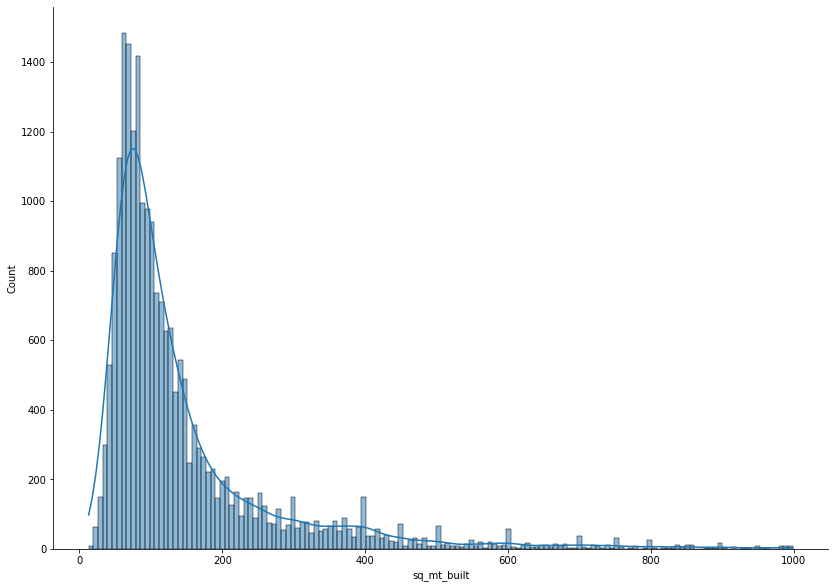

In [ ]:
sns.displot (data = df['sq_mt_built'], kde= True, height=8.27, aspect=11.7/8.27)
plt.show()

In [ ]:

fig = px.box(df['sq_mt_built'],width=700, height=500)
fig.show()

В признаке площади квартиры есть выбросы, удалим их.

In [ ]:
df = df.loc[df['sq_mt_built']<400]

In [ ]:
fig = px.box(df['n_rooms'],width=700, height=500)
fig.show()

В признаке количество комнат так же обнаружили выбросы, удалим их

In [ ]:
df = df.loc[df['n_rooms']<10]

In [ ]:
fig = px.box(df['n_bathrooms'],width=700, height=500)
fig.show()

В признаке количество ванных комнат обнаружены выбросы, удалим их

In [ ]:
df = df.loc[df['n_bathrooms']<5]

In [ ]:
fig = px.box(df['buy_price'],width=700, height=500)
fig.show()

В целевом признаке есть выбросы, отбросим их

In [ ]:
df = df.loc[df['buy_price']<2000000]

In [ ]:
fig = px.box(df['buy_price_by_area'],width=700, height=500)
fig.show()

#Создадим список из категориальных данных и заполним пропуски

In [ ]:
cat_columns = list(df.select_dtypes(include=['object']).columns)

In [ ]:
df[cat_columns] = df[cat_columns].fillna('no_info')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19397 entries, 0 to 21741
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subtitle                      19397 non-null  object 
 1   sq_mt_built                   19397 non-null  float64
 2   n_rooms                       19397 non-null  int64  
 3   n_bathrooms                   19397 non-null  float64
 4   street_name                   19397 non-null  object 
 5   floor                         19397 non-null  object 
 6   is_floor_under                19397 non-null  object 
 7   neighborhood_id               19397 non-null  object 
 8   buy_price                     19397 non-null  int64  
 9   buy_price_by_area             19397 non-null  int64  
 10  house_type_id                 19397 non-null  object 
 11  is_renewal_needed             19397 non-null  bool   
 12  is_new_development            19397 non-null  object 
 13  b

По графику видно, что большинство дешевых квартир было построено псле 1950 года. Как правило старые дома находятся в центре города, а значит и цена на них выше.

In [ ]:
df['built_year'].describe()

count    8866.000000
mean     1969.105685
std        72.865863
min      1723.000000
25%      1956.000000
50%      1970.000000
75%      1992.000000
max      8170.000000
Name: built_year, dtype: float64

В признаках года постройки дома и цена за парковочное место слишом много пропусков, которые нельзя заполнить.

In [ ]:
df = df.drop(['built_year','parking_price'], axis=1)

# Исследуем признак этажность квартиры

In [ ]:
df['floor'].value_counts()

1                       4228
2                       3321
3                       2828
4                       2178
Bajo                    2090
no_info                 1309
5                       1216
6                        849
7                        520
8                        304
Entreplanta exterior     227
9                        170
Semi-sótano exterior      54
Semi-sótano interior      36
Entreplanta interior      31
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: floor, dtype: int64

In [ ]:
list_floors_to_replace = ['Entreplanta exterior', 'Semi-sótano exterior',
       'Semi-sótano interior', 'Sótano interior', 'Entreplanta interior',
       'Sótano', 'Sótano exterior', 'Entreplanta','Semi-sótano']

Заменим дупликаты в столбце с этажами квартир

In [ ]:
for i in list_floors_to_replace:
  df.loc[df['floor']==i,'floor'] = 'Bajo'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19397 entries, 0 to 21741
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subtitle                      19397 non-null  object 
 1   sq_mt_built                   19397 non-null  float64
 2   n_rooms                       19397 non-null  int64  
 3   n_bathrooms                   19397 non-null  float64
 4   street_name                   19397 non-null  object 
 5   floor                         19397 non-null  object 
 6   is_floor_under                19397 non-null  object 
 7   neighborhood_id               19397 non-null  object 
 8   buy_price                     19397 non-null  int64  
 9   buy_price_by_area             19397 non-null  int64  
 10  house_type_id                 19397 non-null  object 
 11  is_renewal_needed             19397 non-null  bool   
 12  is_new_development            19397 non-null  object 
 13  h

In [ ]:
df['floor'].value_counts()

1          4228
2          3321
3          2828
Bajo       2474
4          2178
no_info    1309
5          1216
6           849
7           520
8           304
9           170
Name: floor, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=df['floor'].value_counts().index, values=df['floor'].value_counts(),
                             textinfo='label+percent' )])
fig.show()

По графику видно, что большинство квартир находится на первых трех этажах

In [ ]:
df.groupby(['floor'])['buy_price'].agg({'count', 'median'}).reset_index()

,floor,count,median
0,1,4228,340000.0
1,2,3321,299000.0
2,3,2828,290000.0
3,4,2178,340000.0
4,5,1216,415000.0
5,6,849,499000.0
6,7,520,450000.0
7,8,304,495750.0
8,9,170,532500.0
9,Bajo,2474,199997.0


In [ ]:
df.groupby(['floor'])['sq_mt_built'].agg({'count', 'median'}).reset_index()

,floor,count,median
0,1,4228,93.0
1,2,3321,90.0
2,3,2828,86.0
3,4,2178,91.0
4,5,1216,105.0
5,6,849,113.0
6,7,520,110.5
7,8,304,120.5
8,9,170,138.5
9,Bajo,2474,72.0


In [ ]:
fig = px.bar(x=df.groupby(['floor'])['buy_price'].median().index, y=df.groupby(['floor'])['buy_price'].median(),text_auto=True,
             title="Flat price  by floors",
             labels={"x": "floors", "y": "Flat price"})
fig.show()

Из графика видно, что первые этажи стоят меньше чем более высокие, не считая подвальных.

In [ ]:
fig = px.bar(x=df.groupby(['floor'])['sq_mt_built'].median().index, y=df.groupby(['floor'])['sq_mt_built'].median(),text_auto=True,
             title="Flat size sq meters by floors",
             labels={"x": "floors", "y": "sq meters"})
fig.show()

Здесь видна зависимость площади квартиры от этажа. Чем выше этиж тем больше средняя площадь. 

In [ ]:
df.groupby('floor')['buy_price_by_area'].median()

floor
1          3750.0
2          3635.0
3          3560.0
4          3841.0
5          4182.0
6          4286.0
7          4167.0
8          3971.0
9          3838.5
Bajo       2955.0
no_info    3097.0
Name: buy_price_by_area, dtype: float64

Из данных понятно, что цена за квадратный метр больше всего на 5-7 этажах, самые дешевые квартиры на цокольном этаже.

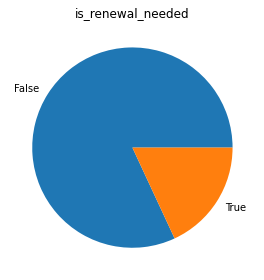

In [ ]:
fig, ax = plt.subplots()
ax.pie(df['is_renewal_needed'].value_counts(), labels=df['is_renewal_needed'].value_counts().index)
ax.set_title('is_renewal_needed')
plt.tight_layout()


По графику видно, что около 25 процентов домов нуждаются в реновации.

#Проверим данные на наличие явных дубликатов и удалим их

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

#Построим корреляцию между признаками

In [ ]:
corr=df.corr()

In [ ]:
fig = px.imshow(corr, text_auto=True)
fig.show()

По данным из корреляции видно, что на целевой признак больше всего влияют цена за квадратный метр, площадь квартиры, количество ванных комнах и общее число комнат.

In [ ]:
df[['is_renewal_needed','has_parking']] = df[['is_renewal_needed','has_parking']].astype(int)

# Подготовим данные для кодирования и проведем его

In [ ]:
cat_columns = list(df.select_dtypes(include=['object']).columns)

In [ ]:
df.loc[:,cat_columns] = df.loc[:,cat_columns].astype(str)

In [ ]:
enc = OrdinalEncoder()
df.loc[:,cat_columns] = enc.fit_transform(df.loc[:,cat_columns])

# Разделим данных для работы с моделью

In [ ]:
features = df.drop('buy_price',axis=1)
target = df['buy_price']

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Построим модели, с помощью валидации проверим их эффективность

In [ ]:
def mae(y, y_pred):
    return (mean_absolute_error(y, y_pred))

def cv_mae(model):
    mae = -cross_val_score(model, features_train, target_train, scoring="neg_mean_absolute_error", cv=kf)
    return (mae)

In [ ]:
kf = KFold(n_splits=3, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_mae(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_mae(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_mae(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_mae(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_mae(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_mae(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_mae(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_mae(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor(verbose=False)
score_catb = cv_mae(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(verbose=False),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(verbose=False),
                              use_features_in_secondary = True)

score_stack_gen = cv_mae(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['MAE_mean'] = cv_scores
final_cv_score['MAE_std'] = cv_std

[14:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
final_cv_score.sort_values(by='MAE_mean')

,Regressors,MAE_mean,MAE_std
8,Cat_Boost_Reg.,4335.353455,5.372060
9,Stacked_Reg.,4716.981345,121.375667
5,Random_Forest_Reg.,4776.557785,165.222691
2,LGBM_Reg.,7281.114508,106.146876
4,Dec_Tree_Reg.,10183.225245,127.362954
7,Grad_Boost_Reg.,13084.561745,218.191297
6,XGB_Reg.,13244.717444,507.296831
1,Bayesian_Ridge_Reg.,62895.141966,866.716260
0,Linear_Reg.,62929.463422,854.038449
3,SVR,258438.320084,4623.611286


Из таблицы видно, что самая результативная модель CatBoost, подберем параметры и оптимизируем модель

In [ ]:
pip install --q optuna

In [ ]:
import optuna

In [ ]:
param_cb = {
            "subsample": optuna.distributions.FloatDistribution (0.5, 0.99),
            'learning_rate': optuna.distributions.FloatDistribution (0.0001, 0.1)
            }
catb = CatBoostRegressor(verbose=False)
optuna_search = optuna.integration.OptunaSearchCV(catb,param_cb, cv=3, scoring='neg_mean_absolute_error',n_jobs=-1,n_trials=100)
optuna_search.fit(features_train, target_train)

<ipython-input-511-4d2e8df6602e>:6: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.

[I 2023-01-10 14:47:51,432] A new study created in memory with name: no-name-0d0bba34-29fd-4ef6-931f-752e0864f2ca
[I 2023-01-10 14:48:31,487] Trial 0 finished with value: -5661.385019795652 and parameters: {'subsample': 0.5055192521852491, 'learning_rate': 0.015791089303306777}. Best is trial 0 with value: -5661.385019795652.
[I 2023-01-10 14:48:37,175] Trial 1 finished with value: -6154.372713428798 and parameters: {'subsample': 0.7999037661630586, 'learning_rate': 0.011922697496129894}. Best is trial 0 with value: -5661.385019795652.
[I 2023-01-10 14:49:03,545] Trial 2 finished with value: -4157.819681002243 and parameters: {'subsample': 0.937613739354613, 'learning_rate': 0.09386641330231534}. Best is trial 2 with value: -4157.819681002243.
[I 2023-01-10 14:49:06,769] Trial 3 finished with value: -4210.430637971089 and parameters

OptunaSearchCV(cv=3,
               estimator=<catboost.core.CatBoostRegressor object at 0x7f734b84a6d0>,
               n_jobs=-1, n_trials=100,
               param_distributions={'learning_rate': FloatDistribution(high=0.1, log=False, low=0.0001, step=None),
                                    'subsample': FloatDistribution(high=0.99, log=False, low=0.5, step=None)},
               scoring='neg_mean_absolute_error')

In [ ]:
-optuna_search.best_score_

4028.986156746109

In [ ]:
best_params = optuna_search.best_params_

In [ ]:
best_params

{'subsample': 0.7405742722761718, 'learning_rate': 0.09250286165955336}

Проверка на тестовой выборке с подобранными параметрами

In [ ]:
catb_fin_model = CatBoostRegressor(verbose=100,
                                   random_seed=42,
                                   **best_params)
catb_fin_model.fit(features_train, target_train)
pred = catb_fin_model.predict(features_test)

0:	learn: 339559.7020726	total: 6.22ms	remaining: 6.21s
100:	learn: 13854.7404638	total: 494ms	remaining: 4.4s
200:	learn: 9790.3642139	total: 1.01s	remaining: 4s
300:	learn: 8011.3312267	total: 1.51s	remaining: 3.5s
400:	learn: 6844.1252141	total: 2.04s	remaining: 3.04s
500:	learn: 6024.8325113	total: 2.78s	remaining: 2.77s
600:	learn: 5396.0959138	total: 3.29s	remaining: 2.18s
700:	learn: 4889.3560784	total: 3.75s	remaining: 1.6s
800:	learn: 4491.0515225	total: 4.28s	remaining: 1.06s
900:	learn: 4168.6776046	total: 4.76s	remaining: 523ms
999:	learn: 3884.0663600	total: 5.26s	remaining: 0us


In [ ]:
mae(target_test, pred)

3855.114944054392

Ошибка в модели со стандартными параметрами оказалась ниже

In [ ]:
catb.fit(features_train, target_train)
pred1 = catb.predict(features_test)

In [ ]:
mae(target_test, pred1)

4053.978814788158

#Общий вывод

Были выполнены шаги:

1) Выполнена предобработка: 
* удалены дубликаты
* обработаны аномалии, связанные с выбросами
* удалены признаки, не влияющие на цену или с большим количеством пропусков
* заполнены пропуски  

2) Проведен анализ признаков  
3) С помощью кросс-валидации выбрана лучшая модель и проведен поиск оптимальных параметров  
4) Проведено обучение и предсказание модели с параметрами по умолчанию и дополнительно с оптимизированными гиперпараметрами.

В качестве использования модели для предсказания цен на недвижимость рекомендуется выбрать CatBoost Regressor.

